In [32]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 14 14:37:33 2019

@author: DELL
"""

# Thêm thư viện
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Hàm sigmoid
def sigmoid(x):
        return 1/(1+np.exp(-x))
 
   
# Đạo hàm hàm sigmoid
def sigmoid_derivative(x):
        return x*(1-x)


# Lớp neural network
class NeuralNetwork:
    def __init__(self, layers, alpha=0.1):
        # self giống như this của mấy ngôn ngữ khác 

		# Mô hình layer ví dụ [2,2,1]
        self.layers = layers 
      
        # Hệ số learning rate
        self.alpha = alpha
		
        # Tham số W, b
        self.W = []
        self.b = []
      
        # Khởi tạo các tham số ở mỗi layer
        for i in range(0, len(layers)-1):
            w_ = np.random.randn(layers[i], layers[i+1])
            b_ = np.zeros((layers[i+1], 1))
            self.W.append(w_/layers[i])
            self.b.append(b_)
            
    
	# Tóm tắt mô hình neural network
    def __repr__(self):
        return "Neural network [{}]".format("-".join(str(l) for l in self.layers))
    
	
	# Train mô hình với dữ liệu
    def fit_partial(self, x, y):
        A = [x]
        
        # quá trình feedforward
        out = A[-1]
        for i in range(0, len(self.layers) - 1):
            out = sigmoid(np.dot(out, self.W[i]) + (self.b[i].T))
            A.append(out)
        
        # quá trình backpropagation
        y = y.reshape(-1, 1)
        dA = [-(y/A[-1] - (1-y)/(1-A[-1]))]
        dW = []
        db = []
        for i in reversed(range(0, len(self.layers)-1)):
            dw_ = np.dot((A[i]).T, dA[-1] * sigmoid_derivative(A[i+1]))
            db_ = (np.sum(dA[-1] * sigmoid_derivative(A[i+1]), 0)).reshape(-1,1)
            dA_ = np.dot(dA[-1] * sigmoid_derivative(A[i+1]), self.W[i].T)
            dW.append(dw_)
            db.append(db_)
            dA.append(dA_)
        
        # Đảo ngược dW, db
        dW = dW[::-1]
        db = db[::-1]
        
		# Gradient descent
        for i in range(0, len(self.layers)-1):
            self.W[i] = self.W[i] - self.alpha * dW[i]
            self.b[i] = self.b[i] - self.alpha * db[i]
      
    def fit(self, X, y, epochs=20, verbose=10, losses=any):
        for epoch in range(0, epochs):
            self.fit_partial(X, y)
            loss = self.calculate_loss(X, y)
            losses.append(loss)
            if epoch % verbose == 0:
                loss = self.calculate_loss(X, y)
                print("Epoch {}, loss {}".format(epoch, loss))
    
	# Dự đoán
    def predict(self, X):
        for i in range(0, len(self.layers) - 1):
            X = sigmoid(np.dot(X, self.W[i]) + (self.b[i].T))
        return X

	# Tính loss function
    def calculate_loss(self, X, y):
        y_predict = self.predict(X)
        #return np.sum((y_predict-y)**2)/2
        return -(np.sum(y*np.log(y_predict) + (1-y)*np.log(1-y_predict))) 
        
# Dataset bài 2
data = pd.read_csv('data_logistic.csv').values
N, d = data.shape
X = data[:, 0:d-1].reshape(-1, d-1)
y = data[:, 2].reshape(-1, 1)

# CASE 1 
# Chia tập dữ liệu thành tập train và tập test theo tỷ lệ 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Khởi tạo và huấn luyện mạng neural network
# p = NeuralNetwork([X.shape[1], 2, 1], 0.1) # một lớp ẩn với 2 Node 
# p = NeuralNetwork([X.shape[1], 4, 3, 2, 1], 0.1) # 4 lớp ẩn với số Node lần lượt là 4, 3, 2 và 1
p = NeuralNetwork([X.shape[1], 2, 1], 0.1) 

losses = []  # List để lưu giá trị loss function qua các epoch
p.fit(X_train, y_train, 10000, 100, losses)

# Dự đoán trên tập test
predictions = p.predict(X_test)

# Chuyển đổi các giá trị dự đoán thành các nhãn nhị phân (0 hoặc 1)
predictions_binary = (predictions > 0.5).astype(int)

# Tính độ chính xác của mô hình trên tập test
accuracy = np.mean(predictions_binary == y_test)
print("Accuracy:", accuracy)

# CASE 2  
# p = NeuralNetwork([X.shape[1], 2, 1], 0.1)
# losses = []  # List để lưu giá trị loss function qua các epoch
# p.fit(X, y, 10000, 100, losses)
# print(losses)


Epoch 0, loss 52.88369750479989
Epoch 100, loss 48.05793722215439
Epoch 200, loss 47.79683790913868
Epoch 300, loss 47.78908446239078
Epoch 400, loss 47.0006972576234
Epoch 500, loss 37.08156892758487
Epoch 600, loss 124.36631998243067
Epoch 700, loss 46.48196774977132
Epoch 800, loss 41.06089662754609
Epoch 900, loss 84.27756686851626
Epoch 1000, loss 36.56432756146826
Epoch 1100, loss 34.570051002369674
Epoch 1200, loss 25.642868519866056
Epoch 1300, loss 35.77884898323451
Epoch 1400, loss 34.48552007137324
Epoch 1500, loss 35.80081339953438
Epoch 1600, loss 31.592931168284395
Epoch 1700, loss 40.38627078671357
Epoch 1800, loss 40.27965790262625
Epoch 1900, loss 31.300083486377
Epoch 2000, loss 33.77862434278509
Epoch 2100, loss 36.005432147237094
Epoch 2200, loss 33.36609401228336
Epoch 2300, loss 33.325266515039296
Epoch 2400, loss 33.72148939490631
Epoch 2500, loss 40.349657684329024
Epoch 2600, loss 35.815079390951844
Epoch 2700, loss 33.466716895569064
Epoch 2800, loss 34.393069

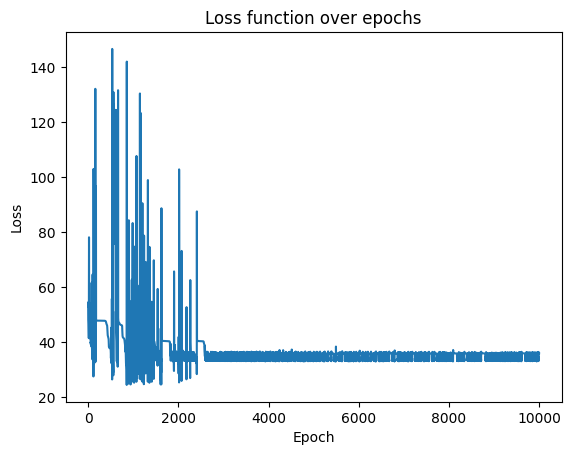

In [33]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ hàm loss function qua các epoch
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss function over epochs')
plt.show()